In [565]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from datetime import date,time
import datetime
import os, time
os.chdir('C:/Users/viswanath_thatha/Documents/Stock-Analysis/OI')

In [566]:
def get_strike_price_from_option_chain_CE(symbol,expdate):
    Base_url = "https://www.nseindia.com/live_market/dynaContent/live_watch/option_chain/optionKeys.jsp?symbol=" + symbol + "&date=-"
    page = requests.get(Base_url)
    soup = BeautifulSoup(page.content,'html.parser')
    curr_price = round(float(soup.find('b').get_text().split(' ')[1]))
    
    table_cls_2 = soup.find(id='octable')
    req_row = table_cls_2.find_all('tr')
    
    strike_price_list = []
    Bid_price_list = []
    Bid_qty = []
    OI = []
    Change_in_OI = [] 
    volume = []
    IV = []
    Net_chg = []
    for row_nbr, tr_nos in enumerate(req_row):
        if row_nbr <= 1 or row_nbr == len(req_row) - 1:
            continue
        
        td_columns = tr_nos.find_all('td')
        strikeprice = int(float(BeautifulSoup(str(td_columns[11]),'html.parser').get_text()))
        #bidqty = int((BeautifulSoup(str(td_columns[7]).replace(' ','').replace(',',''),'html.parser').get_text()))
        oi = (BeautifulSoup(str(td_columns[1]),'html.parser').get_text())
        changeinOI = (BeautifulSoup(str(td_columns[2]),'html.parser').get_text())
        vol = (BeautifulSoup(str(td_columns[3]),'html.parser').get_text())
        iv = (BeautifulSoup(str(td_columns[4]),'html.parser').get_text())
        nc = (BeautifulSoup(str(td_columns[6]),'html.parser').get_text())
        strike_price_list.append(strikeprice)
        Change_in_OI.append(changeinOI)
        volume.append(vol)
        IV.append(iv)
        Net_chg.append(nc)
        OI.append(oi)
        
        a = pd.DataFrame({'Script':symbol,'LTP':curr_price,'strike':strike_price_list,'op':'CE','OI':OI,'Change_in_OI':Change_in_OI,'volume':volume,'IV':IV,'Net Chg':Net_chg,})

    return a

In [567]:
def get_strike_price_from_option_chain_PE(symbol,expdate):
    Base_url = "https://www.nseindia.com/live_market/dynaContent/live_watch/option_chain/optionKeys.jsp?symbol=" + symbol + "&date=-"
    page = requests.get(Base_url)
    soup = BeautifulSoup(page.content,'html.parser')
    curr_price = round(float(soup.find('b').get_text().split(' ')[1]))
    
    table_cls_2 = soup.find(id='octable')
    req_row = table_cls_2.find_all('tr')
    
    strike_price_list = []
    Bid_price_list = []
    Bid_qty = []
    OI = []
    Change_in_OI = [] 
    volume = []
    IV = []
    Net_chg = []
    for row_nbr, tr_nos in enumerate(req_row):
        if row_nbr <= 1 or row_nbr == len(req_row) - 1:
            continue
        
        td_columns = tr_nos.find_all('td')
        strikeprice = int(float(BeautifulSoup(str(td_columns[11]),'html.parser').get_text()))
        oi = (BeautifulSoup(str(td_columns[21]),'html.parser').get_text())
        changeinOI = (BeautifulSoup(str(td_columns[20]),'html.parser').get_text())
        vol = (BeautifulSoup(str(td_columns[19]),'html.parser').get_text())
        iv = (BeautifulSoup(str(td_columns[18]),'html.parser').get_text())
        nc = (BeautifulSoup(str(td_columns[16]),'html.parser').get_text())
        strike_price_list.append(strikeprice)
        Change_in_OI.append(changeinOI)
        volume.append(vol)
        IV.append(iv)
        Net_chg.append(nc)
        OI.append(oi)
        
        pe = pd.DataFrame({'Script':symbol,'LTP':curr_price,'strike':strike_price_list,'op':'PE','OI':OI,'Change_in_OI':Change_in_OI,'volume':volume,'IV':IV,'Net Chg':Net_chg,})
    return pe

In [568]:
a = get_strike_price_from_option_chain_CE('BANKNIFTY','18JUL2019')
b = get_strike_price_from_option_chain_PE('BANKNIFTY','18JUL2019')
a = a[(~a.OI.str.contains('-')) | (~a.volume.str.contains('-')) | (~a.IV.str.contains('-'))]
a['volume'] = a['volume'].replace(',','',regex=True)
a['OI'] = a['OI'].replace(',','',regex=True)
a['Change_in_OI'] = a['Change_in_OI'].replace(',','',regex=True)
if [a.Script.str.contains('BANKNIFTY')]:
    tl = round(a['LTP'][0] * 0.99) 
    tr = round(a['LTP'][0] * 1.01)
    a = (a[a['strike'].between(tl,tr)])
    
b = b[(~b.OI.str.contains('-')) | (~b.volume.str.contains('-')) | (~b.IV.str.contains('-'))]
b['volume'] = b['volume'].replace(',','',regex=True)
b['OI'] = b['OI'].replace(',','',regex=True)
b['Change_in_OI'] = b['Change_in_OI'].replace(',','',regex=True)
if [b.Script.str.contains('BANKNIFTY')]:
    tl = round(b['LTP'][0] * 0.99) 
    tr = round(b['LTP'][0] * 1.01)
    b = (b[b['strike'].between(tl,tr)])

final = pd.merge(a[['OI','Change_in_OI','volume','IV','strike']],b[['OI','Change_in_OI','volume','IV','strike']],on='strike')
final['OI_x'] = final['OI_x'].astype(int)
final['OI_y'] = final['OI_y'].astype(int)
final['Change_in_OI_x'] =  final['Change_in_OI_x'].astype(int)
final['Change_in_OI_y'] =  final['Change_in_OI_y'].astype(int)
final['volume_x'] = final['volume_x'].astype(int)
final['volume_y'] = final['volume_y'].astype(int)
final.to_csv('OI-'+'BN'+'-'+time.strftime("%Y,%m,%d,%H-%M-%S.csv"))

In [569]:
import os
arr = next(os.walk('.'))[2]
dfs = []
for i in arr:
    dfs.append(pd.read_csv(i))
conc = pd.concat(dfs)
conc.iloc[:,1:].head()

,OI_x,Change_in_OI_x,volume_x,IV_x,strike,OI_y,Change_in_OI_y,volume_y,IV_y
0,9020,5060,12278,15.65,30200,356920,172180,365640,15.53
1,28080,22020,65202,15.44,30300,323420,103420,378922,15.18
2,110480,91820,179142,15.10,30400,232420,49820,356827,14.64
3,392840,301520,340828,14.90,30500,221140,-75080,316757,14.00
4,496440,292260,424808,15.00,30600,101640,-57720,139868,13.58


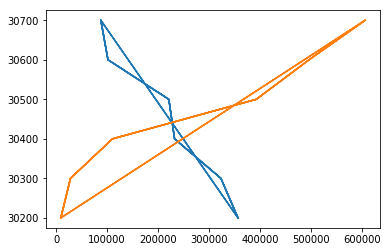

In [574]:
plt.plot(conc['OI_y'],conc['strike'],conc['OI_x'],conc['strike'])